<h2>DON'T run all cells. Cells in which MLP regressor and SVR are being trained are VERY VERY SLOW.</h2>

<h2>Import</h2>

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


<h2>Initialization</h2>

In [2]:
import glob

path ='./data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
derived_columns = ['D' + str(i) for i in range(1,26)]
columns = [
    'page_likes',
    'page_checkins',
    'page_talking_about',
    'page_category',
]
columns = columns + derived_columns
columns = columns + ['cc1', 
                     'cc2', 
                     'cc3',
                     'cc4',
                     'cc5',
                     'base_time',
                     'post_length',
                     'post_share_count',
                     'post_promotion_status',
                     'h_local']
ppw_columns = ['ppw' + str(i) for i in range(1,8)]
bdtw_columns = ['bdtw' + str(i) for i in range(1,8)]

columns = columns + ppw_columns + bdtw_columns + ['target_value']

print(columns)
print(len(columns))

for file_ in allFiles:
    df = pd.read_csv(file_,names=columns)
    list_.append(df)
frame = pd.concat(list_)
frame.head()

['page_likes', 'page_checkins', 'page_talking_about', 'page_category', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'cc1', 'cc2', 'cc3', 'cc4', 'cc5', 'base_time', 'post_length', 'post_share_count', 'post_promotion_status', 'h_local', 'ppw1', 'ppw2', 'ppw3', 'ppw4', 'ppw5', 'ppw6', 'ppw7', 'bdtw1', 'bdtw2', 'bdtw3', 'bdtw4', 'bdtw5', 'bdtw6', 'bdtw7', 'target_value']
54


,page_likes,page_checkins,page_talking_about,page_category,D1,D2,D3,D4,D5,D6,...,ppw6,ppw7,bdtw1,bdtw2,bdtw3,bdtw4,bdtw5,bdtw6,bdtw7,target_value
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


<h2>Linear Regression</h2>

In [55]:
X = frame.drop(['cc5','target_value'], axis=1)
y = frame['target_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model_linreg = linear_model.LinearRegression()
model_linreg.fit(X_train, y_train)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((model_linreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_linreg.score(X_test, y_test))

Mean squared error: 792.67
Variance score: 0.35


<h2>Linear Regression without derived attributes</h2>

In [56]:
X = frame.drop(['cc5','target_value'], axis=1)
X = X.drop(derived_columns, axis=1)
y = frame[['target_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model_linreg2 = linear_model.LinearRegression()
model_linreg2.fit(X_train, y_train)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((model_linreg2.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_linreg2.score(X_test, y_test))

Mean squared error: 754.96
Variance score: 0.32


<h2>Conclusion: Removing derived attributes results to approximately the same accuracy</h2>
<p>Accuracy fluctuates from around 28% to 35%</p>

<h2>Preprocessing</h2>

In [61]:
# Feature Selection
X2 = frame.drop(['cc5','target_value'], axis=1)
X2 = X2.drop(derived_columns, axis=1)
X2 = X2.drop(ppw_columns, axis=1)
X2 = X2.drop(bdtw_columns, axis=1)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X2 = scaler.fit_transform(X2)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

<h2>Using Ridge Regression</h2>

In [62]:
model_ridge = linear_model.Ridge(alpha=1)
model_ridge.fit(X_train, y_train)
print(model_ridge.score(X_test, y_test))

0.317288263438


<h2>Using Lasso Regression</h2>

In [66]:
# Feature Selection
X_lasso = frame.drop(['cc5','target_value'], axis=1)
X_lasso = X_lasso.drop(derived_columns, axis=1)
X_lasso = X_lasso.drop(ppw_columns, axis=1)
X_lasso = X_lasso.drop(bdtw_columns, axis=1)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size=0.3)

model_lasso = linear_model.Lasso(alpha=1, normalize=False)
model_lasso.fit(X_train, y_train)
print(model_lasso.score(X_test, y_test))
# slow training time. linear and ridge regression took about a second, lasso took a minute.
## update! it is fast now though the output is wrong.... what's going on?!!?
### update! okay. so lasso regression works if the data is not normalized. If normalization is applied, training time will be fast but wrong.

0.309054601729


<h2>Using Linear Regression with Polynomial Features</h2>

In [12]:
from sklearn.preprocessing import PolynomialFeatures

X3 = scaler.fit_transform(X2)
y = frame['target_value']
X_tfm = PolynomialFeatures(degree=2).fit_transform(X2)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfm, y, test_size=0.3)
model_polyreg = linear_model.LinearRegression()
model_polyreg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(model_polyreg.score(X_test2, y_test2))
# print(model_polyreg.coef_)

0.480641865915


<h2>Using Neural Network</h2>

In [15]:
from sklearn.neural_network import MLPRegressor

model_nn = MLPRegressor(hidden_layer_sizes=(8,6))
# model = MLPRegressor()
model_nn.fit(X_train, y_train)
print(model_nn.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.496536355341


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [150]:
model_nn2 = MLPRegressor(hidden_layer_sizes=(9,7))
# model = MLPRegressor()
model_nn2.fit(X_train, y_train)
print(model_nn2.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.619573108098


In [17]:
model_nn3 = MLPRegressor(hidden_layer_sizes=(11,8), alpha=0.01)
# model = MLPRegressor()
model_nn3.fit(X_train, y_train)
print(model_nn3.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.608572774049


In [157]:
model_nn4 = MLPRegressor(hidden_layer_sizes=(500,1), alpha=2)
# model = MLPRegressor()
model_nn4.fit(X_train, y_train)
print(model_nn4.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.600246533126


In [167]:
X_nn = X2[:100000]
y_nn = y[:100000]
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.3)

model_nn5 = MLPRegressor(hidden_layer_sizes=(700,1), alpha=2, learning_rate_init=0.01)
# model = MLPRegressor()
model_nn5.fit(X_train_nn, y_train_nn)
print(model_nn5.score(X_test_nn, y_test_nn))

0.455776824744


In [26]:
# Feature Selection
X_comp = frame.drop(['cc5','target_value'], axis=1)
X_comp = X_comp.drop(derived_columns, axis=1)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_comp = scaler.fit_transform(X_comp)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_comp, y, test_size=0.3)

from sklearn.neural_network import MLPRegressor
model_nn6 = MLPRegressor(hidden_layer_sizes=(9,7), alpha=0.01)
# model = MLPRegressor()
model_nn6.fit(X_train, y_train)
print(model_nn6.score(X_test, y_test))

0.635162523787


In [29]:
from sklearn.neural_network import MLPRegressor
model_nn7 = MLPRegressor(hidden_layer_sizes=(9,7), alpha=0.01)
# model = MLPRegressor()
model_nn7.fit(X_train, y_train)
print(model_nn7.score(X_test, y_test))

0.622111175128


In [30]:
from sklearn.neural_network import MLPRegressor
model_nn8 = MLPRegressor(hidden_layer_sizes=(8,6), alpha=0.01)
# model = MLPRegressor()
model_nn8.fit(X_train, y_train)
print(model_nn8.score(X_test, y_test))

0.624814055251


<h2>Using SVM</h2>

In [169]:
from sklearn import svm

model_svm = svm.SVR(kernel='poly', degree=3, max_iter=10000)
model_svm.fit(X_train, y_train)
print(model_svm.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


-0.921819549331


In [ ]:
model_svm2 = svm.SVR(kernel='linear')
model_svm2.fit(X_train, y_train)
print(model_svm2.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn import svm
X_svm = X2[:10000]
y_svm = y[:10000]

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_svm, y_svm, test_size=0.3)
model_svm3 = svm.SVR(kernel='linear', gamma=5, epsilon=5, max_iter=5000)
model_svm3.fit(X_train, y_train)
print(model_svm3.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


-0.721085923655


<h2>Save models</h2>

In [27]:
from sklearn.externals import joblib

path = 'models/'
# joblib.dump(model_polyreg, path+'polyreg.pkl') 
# joblib.dump(model_nn, path+'nn.pkl') 
# joblib.dump(model_nn3, path+'nn3.pkl') 
joblib.dump(model_nn6, path+'nn6.pkl')

['models/nn6.pkl']

<h2>Load models</h2>

In [3]:
from sklearn.externals import joblib

path = 'models/'
model_nn3 = joblib.load(path+'nn3.pkl')  #Neural network, derived attributes with some features removed.
model_nn6 = joblib.load(path+'nn6.pkl')  #Neural network, derived attributes removed.
model_polyreg = joblib.load(path+'polyreg.pkl') 

<h2>Preprocessing</h2>

In [4]:
# Feature Selection
X0 = frame.drop(['cc5','target_value'], axis=1)
X0 = X0.drop(derived_columns, axis=1)
X0 = X0.drop(ppw_columns, axis=1)
X0 = X0.drop(bdtw_columns, axis=1)
y = frame['target_value']

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X0 = scaler.fit_transform(X0)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size=0.3)

<h2>Polynomial Regression plot</h2>

In [35]:
from sklearn.preprocessing import PolynomialFeatures

X_tfm = PolynomialFeatures(degree=2).fit_transform(X0)
X_train, X_test, y_train, y_test = train_test_split(X_tfm, y, test_size=0.3)

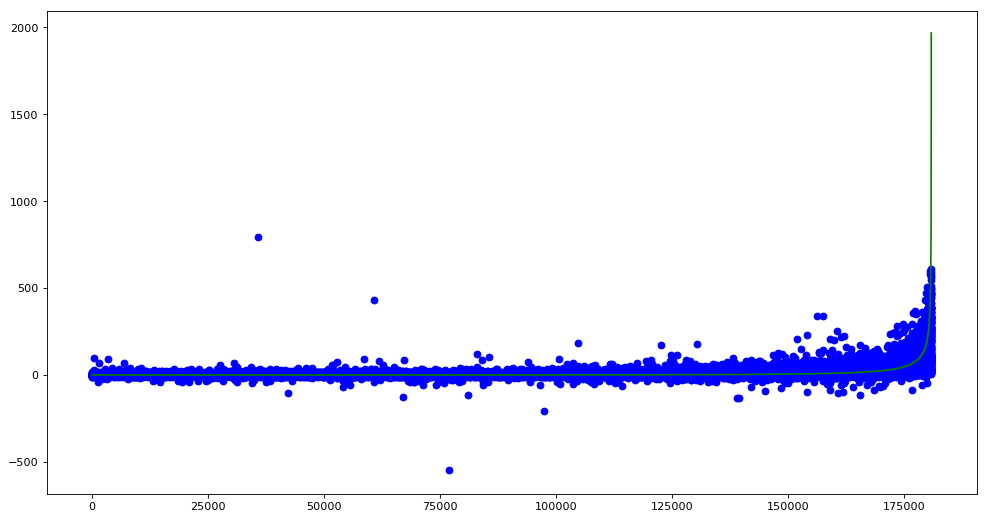

Score : 0.458028228093


In [38]:
temp = pd.DataFrame(data=X_test)
temp['actual'] = y_test.values
temp['predict'] = model_polyreg.predict(X_test)
# temp.ideal
# temp.predict

temp.sort_values(by='actual', ascending=True, inplace=True)
actual_plot = temp.actual
predict_plot = temp.predict

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(actual_plot)), actual_plot,color='g')
plt.scatter(range(len(actual_plot)), predict_plot,color='b')

plt.show()
print('Score : ' + str(model_polyreg.score(X_test, y_test)))

<h2>Neural Network plot</h2>

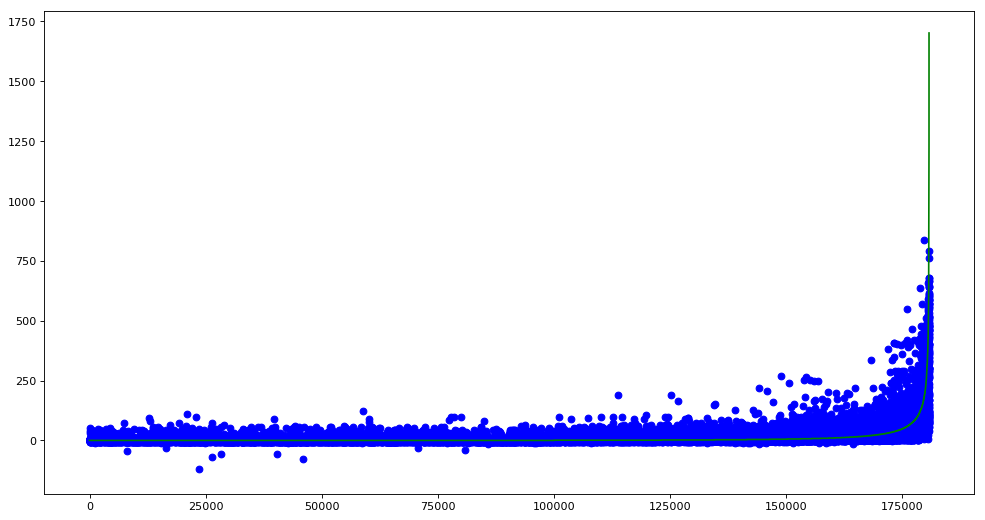

Score : 0.635851513294


In [5]:
#some features removed
temp = pd.DataFrame(data=X_test)
temp['actual'] = y_test.values
temp['predict'] = model_nn3.predict(X_test)
# temp.ideal
# temp.predict

temp.sort_values(by='actual', ascending=True, inplace=True)
actual_plot = temp.actual
predict_plot = temp.predict

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(actual_plot)), actual_plot,color='g')
plt.scatter(range(len(actual_plot)), predict_plot,color='b')
plt.show()

# import seaborn as sns
# ax = sns.distplot(actual_plot, color='red')
# sns.distplot(cleaned_data[cleaned_data['content_rating'] == 'R']["imdb_score"], color='teal', ax=ax)


print('Score : ' + str(model_nn3.score(X_test, y_test)))

In [67]:
# Feature Selection
X00 = frame.drop(['cc5','target_value'], axis=1)
X00 = X00.drop(derived_columns, axis=1)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X00 = scaler.fit_transform(X00)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X00, y, test_size=0.3)

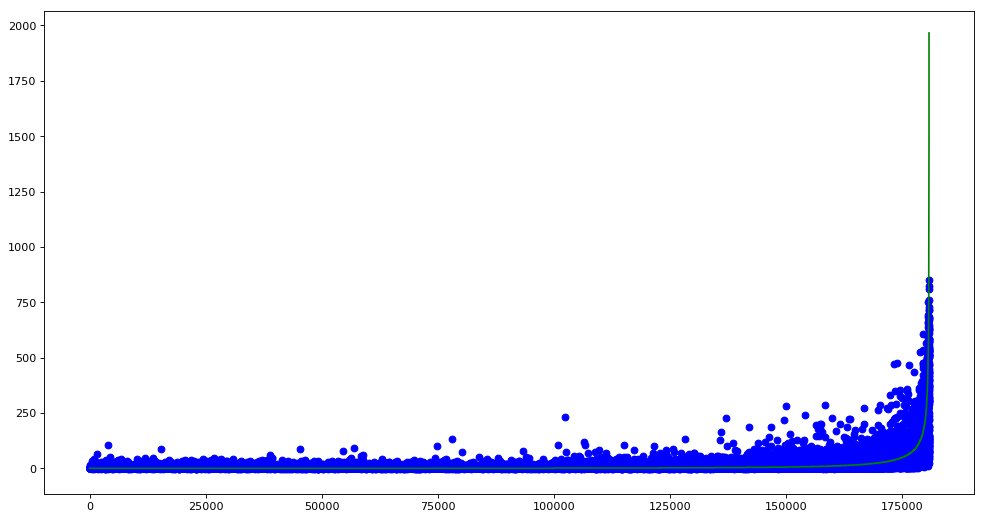

Score : 0.633014429127


In [68]:
temp = pd.DataFrame(data=X_test)
temp['actual'] = y_test.values
temp['predict'] = model_nn6.predict(X_test)

temp.sort_values(by='actual', ascending=True, inplace=True)
actual_plot = temp.actual
predict_plot = temp.predict

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(actual_plot)), actual_plot,color='g')
plt.scatter(range(len(actual_plot)), predict_plot,color='b')

plt.show()
print('Score : ' + str(model_nn6.score(X_test, y_test)))

In [54]:
# frame[['cc1','cc2','cc3','cc4','cc5','target_value']]